In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom

# Load DICOM data
dicom_dir = "B:/Sami Sir Research/Data set/pd/PPMI/140258/Reconstructed_DaTSCAN/2023-07-13_16_38_33.0/I10380680"
dicom_files = sorted([os.path.join(dicom_dir, file) for file in os.listdir(dicom_dir) if file.endswith('.dcm')])

try:
    dicom_data = [pydicom.dcmread(file) for file in dicom_files]
    preprocessed_image_data = np.stack([dicom.pixel_array for dicom in dicom_data])
    
    # Remove single channel dimension if present
    preprocessed_image_data = np.squeeze(preprocessed_image_data)
except Exception as e:
    print("Error loading DICOM data:", e)
    exit()

# Check the dimensions of the preprocessed image data
print("Image Shape:", preprocessed_image_data.shape)

# Visualize slices 39 to 44 sequentially: Axial, Sagittal, and Coronal
slices_to_visualize = [30,31,32,33,34,35,36,37,38,39, 40, 41, 42, 43, 44,45,46,47,48,49,50,51]
num_slices = len(slices_to_visualize)







Image Shape: (91, 109, 91)


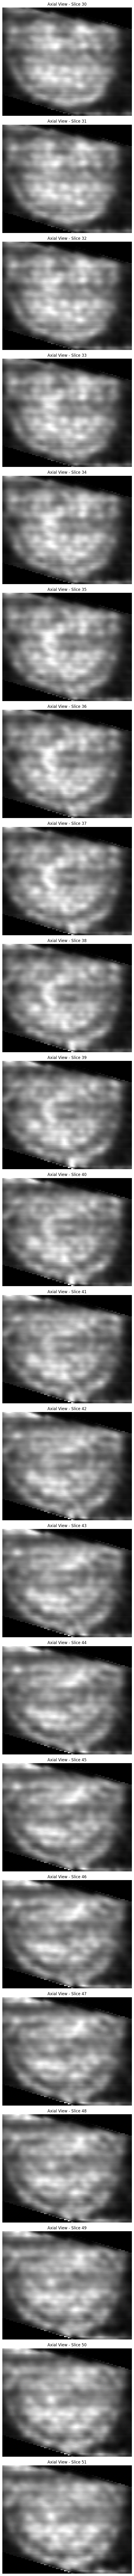

In [2]:
# Plot axial views
fig, axes = plt.subplots(num_slices, 1, figsize=(10, 5 * num_slices))
for i, slice_index in enumerate(slices_to_visualize):
    axes[i].imshow(preprocessed_image_data[:, :, slice_index], cmap='gray', aspect='equal')
    axes[i].set_title(f'Axial View - Slice {slice_index}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

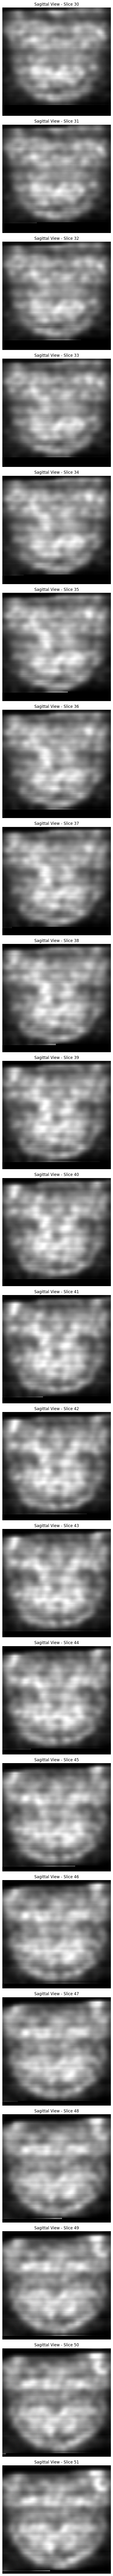

In [3]:
# Plot sagittal views
fig, axes = plt.subplots(num_slices, 1, figsize=(10, 5 * num_slices))
for i, slice_index in enumerate(slices_to_visualize):
    axes[i].imshow(preprocessed_image_data[:, slice_index, :], cmap='gray', aspect='equal')
    axes[i].set_title(f'Sagittal View - Slice {slice_index}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

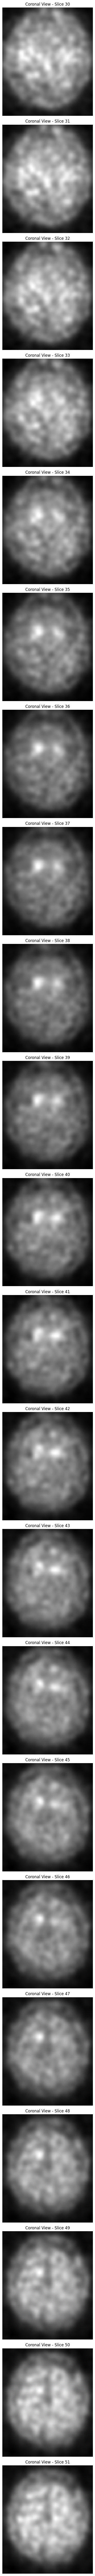

In [4]:
# Plot coronal views
fig, axes = plt.subplots(num_slices, 1, figsize=(10, 5 * num_slices))
for i, slice_index in enumerate(slices_to_visualize):
    axes[i].imshow(preprocessed_image_data[slice_index, :, :], cmap='gray', aspect='equal')
    axes[i].set_title(f'Coronal View - Slice {slice_index}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
